

# Demand Forecasting
Demand forecasting involves predicting future customer demand using historical sales data and other relevant external factors. This predictive analysis helps businesses prepare for future sales and adjust their operations accordingly. Here are some key aspects:

1. **Understanding Patterns**: By analyzing historical data, businesses can identify patterns such as seasonal trends, cyclical demand, and growth trends. This understanding helps in planning for peak periods, sales promotions, and managing resources effectively.

2. **External Factors**: In addition to past sales, factors like market trends, economic conditions, competitor actions, and changes in consumer preferences also influence demand. Incorporating these factors into the forecasting model enhances its accuracy and reliability.

3. **Benefits**: Accurate demand forecasting enables businesses to manage their inventory better, plan their production schedules, optimize workforce allocation, and ensure better financial planning. It minimizes the risks of stockouts and excess inventory, both of which can be costly.

### Inventory Optimization: A Closer Look
Inventory Optimization is about finding the optimal balance between meeting customer demand and minimizing inventory costs. It requires effective inventory management strategies that rely on accurate demand forecasts. Key components include:

1. **Reorder Point Formula**: This calculates the minimum level of inventory that triggers a reorder. It's critical for maintaining stock availability without overstocking.

2. **Safety Stock**: Extra inventory that acts as a buffer against demand variability and supply chain delays. Calculating the right amount of safety stock is crucial for maintaining service levels, especially in unpredictable markets.

3. **Economic Order Quantity (EOQ)**: EOQ helps determine the most cost-effective quantity of stock to order considering various costs such as ordering costs, holding costs, and shortage costs. Using EOQ can significantly reduce the total inventory management costs.

4. **Just-in-Time (JIT)**: A strategy aimed at reducing in-process inventory and associated carrying costs. JIT involves receiving goods only as they are needed in the production process, which minimizes inventory levels.

### Strategic Importance
These processes are not just operational necessities but strategic enablers in today's business environment:

- **Competitive Advantage**: Companies that can accurately forecast demand and optimize inventory can respond more quickly to market changes, potentially gaining a competitive edge.

- **Customer Satisfaction**: Being able to meet customer demand consistently without delays due to stockouts improves customer loyalty and satisfaction.

- **Cost Efficiency**: Effective inventory management reduces the costs associated with excess inventory and storage, helping to streamline operations and increase profitability.

- **Risk Management**: These strategies also help mitigate risks associated with demand fluctuations, supply chain disruptions, and economic uncertainties.

Demand Forecasting and Inventory Optimization are essential for modern businesses across various sectors. They not only support day-to-day operational decisions but also contribute to long-term strategic planning and financial health. Businesses that master these competencies are better equipped to adapt to market changes, satisfy customers, and maintain a healthy balance sheet.

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install plotly


data = pd.read_csv("C:/Users/anike/OneDrive/Desktop/Projects/Demand/demand_inventory.csv")
print(data.head())

   Unnamed: 0        Date Product_ID  Demand  Inventory
0           0  2023-06-01         P1      51       5500
1           1  2023-06-02         P1     141       5449
2           2  2023-06-03         P1     172       5308
3           3  2023-06-04         P1      91       5136
4           4  2023-06-05         P1     198       5045


## Remove Unnecessary Columns
Upon loading the data, you often encounter extraneous columns. For example, an "Unnamed: 0" column usually represents an index that was included during the saving process of the dataset. Removing this column simplifies your dataset, making it cleaner and more focused. You can do this by either using a column drop function or by specifying not to import the index column when loading the data.

In [8]:
data = data.drop(columns=['Unnamed: 0'])

## Enhance the Plot:
You might want to customize the plot to improve its clarity or presentation. Plotly Express offers several options for customization:
Labeling Axes: You can add labels to your axes to make the chart clearer.
Styling Lines: Change the line color, width, or type (dashed, dotted, etc.).
Adding Markers: You can add markers to each data point on the line.
Hover Information: Customize the information displayed when hovering over points.

In [14]:
fig_demand.update_layout(
    xaxis_title="Date",
    yaxis_title="Demand",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig_demand.update_traces(marker=dict(size=10, color='LightSkyBlue'),
                         selector=dict(mode='markers+lines'))


To enhance the visualization of the inventory data over time using Plotly Express, you can customize various aspects of the plot, including the styling of the chart, axis titles, the line color, and adding markers. Below, I'll provide a more detailed and visually appealing version of the code you've provided.


###  Customizations
- **Line Shape and Markers**: `line_shape='linear'` and `markers=True` add visual distinction to the plot by clarifying each datapoint with a marker.
- **Line and Marker Styling**: Adjustments to the line's width and color (`line=dict(width=2.5, color='RoyalBlue')`) and marker's size, color, and shape (`marker=dict(size=7, color='DarkSlateBlue', symbol='circle')`) help make significant data points more noticeable.
- **Layout Template**: Using `template='plotly_white'` offers a clean and uncluttered background, making it easier to focus on the data.
- **Font and Legend Customization**: Modifying the font style, size, and color enhances readability and aesthetic appeal.
- **X-axis and Y-axis Adjustments**: Specific tweaks such as the rotation of date labels (`tickangle=-45`), the number of ticks (`nticks=20`), and the y-axis title standoff provide better scaling and layout management.

These customizations will make your inventory time series plot more engaging and easier to interpret, especially useful for presentations or detailed data analysis sessions.

In [15]:
import plotly.express as px
import pandas as pd

# Ensure the Date column is in the proper datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create the plot
fig_inventory = px.line(data, x='Date', y='Inventory', title='Inventory Over Time',
                        line_shape='linear',  # This can be 'linear', 'spline', 'vhv', etc.
                        markers=True,  # Adds markers to each data point
                        )

# Customizing the appearance of the plot
fig_inventory.update_traces(line=dict(width=2.5, color='RoyalBlue'),  # Adjust line width and color
                            marker=dict(size=7, color='DarkSlateBlue', symbol='circle'))  # Marker style

fig_inventory.update_layout(
    template='plotly_white',  # Cleaner background for better visibility
    xaxis_title='Date',
    yaxis_title='Inventory Level',
    legend_title='Legend',
    font=dict(
        family='Arial, sans-serif',  # More readable font type
        size=14,  # Font size for better readability
        color='RebeccaPurple'  # Fun color for the font
    ),
    xaxis=dict(
        tickangle=-45,  # Rotate the date labels for better fitting and readability
        nticks=20,  # Number of ticks on the x-axis
        tickformat="%b %d, %Y"  # Date format
    ),
    yaxis=dict(
        title_standoff=25  # Distance of y-axis title from the axis
    )
)

# Show the plot
fig_inventory.show()


## Perform demand forecasting 
A dataset with noticeable seasonal patterns, using a SARIMA (Seasonal Autoregressive Integrated Moving Average) model is a suitable approach. SARIMA is powerful for handling both non-seasonal and seasonal fluctuations in time series data. Before you can effectively fit a SARIMA model, you must first determine the appropriate parameters, including the seasonal and non-seasonal orders of autoregressive (AR) and moving average (MA) components. 

Here’s a detailed breakdown of your provided Python script, which prepares you to identify the best values of \( p \) and \( q \) (the order of the autoregressive and moving average parts of the model, respectively) using the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

### Step-by-Step Breakdown

1. **Convert 'Date' Column to DateTime**:
   - This conversion ensures that the 'Date' field is correctly recognized as a date type, which is critical for any time series analysis. The format parameter explicitly specifies the expected date structure, aligning it with the dataset.
  

2. **Set Date as Index and Isolate the 'Demand' Column**:
   - By setting 'Date' as the index and focusing on the 'Demand' column, you reshape the DataFrame to facilitate time series operations and analyses directly on the demand values.
   

3. **Differencing the Series**:
   - Differencing the series helps to make the time series stationary, which is a requirement for most time series forecasting methods, including SARIMA. This step reduces or removes trend and seasonality.
  

4. **Plotting ACF and PACF**:
   - You then visualize the ACF and PACF of the differenced series. The ACF plot shows the correlation of the series with itself at different lags, while the PACF shows the partial correlation of the series with its own lagged values, controlling for the values of the time series at all shorter lags.
   - This visualization helps determine the parameters \( p \) and \( q \) for the AR and MA components:
    

### After Executing the Code
- **Interpretation of ACF/PACF Plots**:
  - The ACF plot typically shows a gradual decline or a sharp cut-off. A sharp cut-off in the ACF suggests a potential MA component.
  - The PACF plot typically exhibits a sharp decline after a certain number of lags, indicating a potential AR component.
  
- **Next Steps**:
  - Use the insights from the ACF and PACF plots to specify the \( p \), \( d \), and \( q \) parameters for the SARIMA model.
  - Additionally, consider the seasonal component of the SARIMA model, which includes seasonal autoregressive order, seasonal differencing order, and seasonal moving average order, along with the length of the season.

This analysis forms a critical foundation for developing a robust SARIMA model that can accurately forecast future demand considering both seasonal and non-seasonal patterns.

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



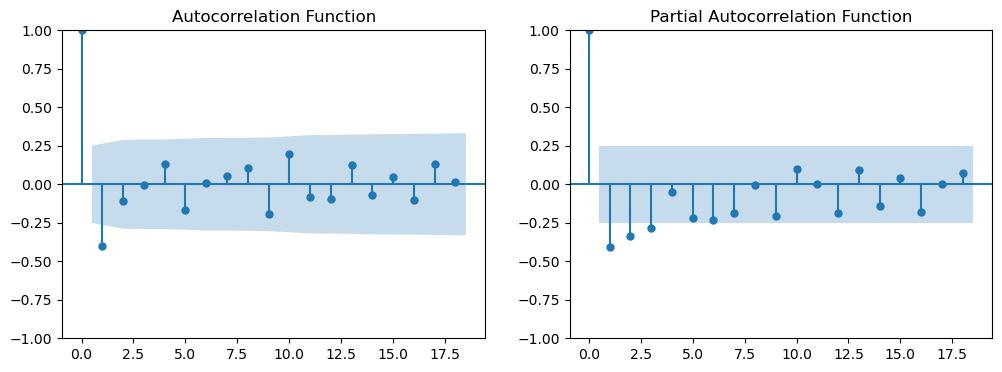

In [19]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'Date' column to datetime using a specific format
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

# Set 'Date' as the index of the DataFrame and select the 'Demand' column
time_series = data.set_index('Date')['Demand']

# Perform differencing to make the series stationary
differenced_demand = time_series.diff().dropna()

# Create a function to plot ACF and PACF
def plot_acf_pacf(series):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=ax1, title='Autocorrelation Function')  # Customize title
    plot_pacf(series, ax=ax2, title='Partial Autocorrelation Function')  # Customize title
    plt.show()

# Call the function with the differenced data
plot_acf_pacf(differenced_demand)


The value of p, d, and q will be 1, 1, 1 here.

### Understanding the SARIMAX Model
1. **Model Components**:
   - **SARIMA**: This stands for Seasonal Autoregressive Integrated Moving Average. It's designed to model time series data that exhibits seasonality - periodic fluctuations that follow a consistent pattern over time based on the season (e.g., monthly, quarterly).
   - **X (Exogenous factors)**: These are external variables you might incorporate into the model if they influence the time series (though not directly covered in basic SARIMA models). Examples could include economic indicators or marketing activities.

2. **Parameter Selection (p, d, q) and (P, D, Q, s)**:
   - The non-seasonal parameters (p, d, q) reflect the autoregression order, degree of differencing, and moving average order, respectively, needed to model non-seasonal changes in the series.
   - The seasonal parameters (P, D, Q, s) extend this model to capture seasonal effects. Here, 's' represents the length of the seasonal cycle, while P, D, and Q specifically address seasonal autoregression, differencing, and moving average.

### Model Fitting and Forecasting
- The model fitting process involves estimating the various parameters based on historical data. This process is crucial as it impacts the accuracy of future forecasts.
- Forecasting with SARIMAX then involves predicting future values based on both the identified patterns in the historical data and the model’s understanding of seasonality.

### Practical Considerations
- **Model Diagnostics**: After fitting a SARIMAX model, reviewing diagnostic plots helps evaluate the model’s adequacy. Checking aspects such as residual normality and the absence of autocorrelation in residuals can indicate a good fit.
- **Forecast Accuracy**: Evaluating forecast accuracy through measures like the Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) helps understand how well the model might perform in practical scenarios.

### Importance in Business and Decision Making
- **Inventory Management**: Accurate forecasts allow businesses to manage inventory more efficiently, reducing costs associated with overstocking or understocking.
- **Strategic Planning**: Demand forecasts inform broader business strategies, including capacity planning, budgeting, and market expansion decisions.

In essence, the SARIMAX model offers a robust framework for forecasting in scenarios where both internal dynamics and external influences shape the trends observed in the data. Its utility in business, particularly in sectors like retail, manufacturing, and logistics where understanding seasonal trends is critical, cannot be overstated.

In [20]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 2) #2 because the data contains a time period of 2 months only
model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

future_steps = 10
predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
print(predictions)

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2023-08-02    117
2023-08-03    116
2023-08-04    130
2023-08-05    114
2023-08-06    128
2023-08-07    115
2023-08-08    129
2023-08-09    115
2023-08-10    129
2023-08-11    115
Freq: D, Name: predicted_mean, dtype: int32


In [21]:
# Create date indices for the future predictions
future_dates = pd.date_range(start=time_series.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')

# Create a pandas Series with the predicted values and date indices
forecasted_demand = pd.Series(predictions, index=future_dates)

# Initial inventory level
initial_inventory = 5500

# Lead time (number of days it takes to replenish inventory) 
lead_time = 1 # it's different for every business, 1 is an example

# Service level (probability of not stocking out)
service_level = 0.95 # it's different for every business, 0.95 is an example

# Calculate the optimal order quantity using the Newsvendor formula
z = np.abs(np.percentile(forecasted_demand, 100 * (1 - service_level)))
order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)

# Calculate the reorder point
reorder_point = forecasted_demand.mean() * lead_time + z

# Calculate the optimal safety stock
safety_stock = reorder_point - forecasted_demand.mean() * lead_time

# Calculate the total cost (holding cost + stockout cost)
holding_cost = 0.1  # it's different for every business, 0.1 is an example
stockout_cost = 10  # # it's different for every business, 10 is an example
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)

# Calculate the total cost
total_cost = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity)
print("Reorder Point:", reorder_point)
print("Safety Stock:", safety_stock)
print("Total Cost:", total_cost)

Optimal Order Quantity: 236
Reorder Point: 235.25
Safety Stock: 114.45
Total Cost: 561.8000000000001


Absolutely, you’ve captured the essence of how SARIMAX models operate and their application quite well. Let's explore a bit more about how each component of SARIMAX contributes to its robustness and some strategic decisions you might make based on its outputs.

### Deeper Dive into SARIMAX Components

**1. Integrated Seasonality (SARIMA Part)**
   - **Seasonality Handling**: The SARIMA component effectively identifies and models the seasonality, which can vary widely across different industries or even different products within the same industry. For instance, the demand patterns for a retailer selling beachwear will peak in summer months, distinctly different from those selling winter clothing.
   - **Adaptability**: The flexibility to model data with multiple seasonal periods (e.g., weekly, monthly, yearly) makes SARIMA incredibly versatile and applicable to a range of forecasting scenarios.

**2. Exogenous Variables (X Part)**
   - **External Influences**: By incorporating exogenous variables (external influences), the SARIMAX model allows forecasters to integrate crucial information that SARIMA alone would miss. For instance, a sudden change in economic policy or a new marketing campaign can be modeled effectively.
   - **Forecast Enhancement**: Including exogenous variables can significantly enhance the forecast's accuracy, especially in cases where external factors strongly influence the time series.

### Strategic Decision-Making Based on SARIMAX Outputs

**1. Inventory Management**
   - **Optimized Stock Levels**: With accurate demand forecasting, businesses can maintain optimal inventory levels—enough to meet customer demands without incurring excessive holding costs.
   - **Responsive Reordering**: The model can help determine the best times to reorder stock, especially for items with long lead times or seasonal demand, ensuring continuity of supply.

**2. Strategic Planning**
   - **Capacity Planning**: Forecasts can inform decisions on whether to scale up operations or downsize. This could involve decisions on hiring, investments in new equipment, or expanding into new markets.
   - **Budget Allocation**: More accurate forecasts allow for better allocation of budgets, particularly in marketing, production, and logistics.

**3. Risk Management**
   - **Demand Uncertainty**: The model helps mitigate risks associated with demand uncertainty by providing a clearer picture of future demand patterns.
   - **Scenario Planning**: Businesses can use forecasts to simulate different scenarios (e.g., best case, worst case) and develop strategies to handle potential future states effectively.

### Broader Implications

The use of SARIMAX in sectors like retail, energy, and manufacturing underpins its broader implications in driving efficiency, enhancing customer satisfaction, and boosting profitability. Its ability to account for both internal and external dynamics positions it as a critical tool in the toolkit of business analysts, forecasters, and strategic planners. 

The practical implementation of such a model requires a deep understanding of both the model's capabilities and the business's operational dynamics. This synergy between statistical techniques and business acumen can lead to significantly improved decision-making processes.